In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random

In [2]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
# Get X & y values in array format to perform PCA
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [4]:
pca = PCA()
principalComponents = pca.fit_transform(x)

In [5]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

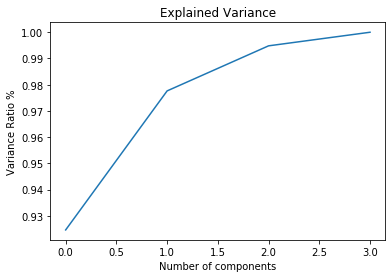

In [6]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance Ratio %')
plt.title('Explained Variance')
plt.show()

As seen in the plot, 3 components explain all the variance in the dataset. Hence, using n_components=3 for pca

In [7]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [8]:
# Creating dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])

In [9]:
# Assigning target as well
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

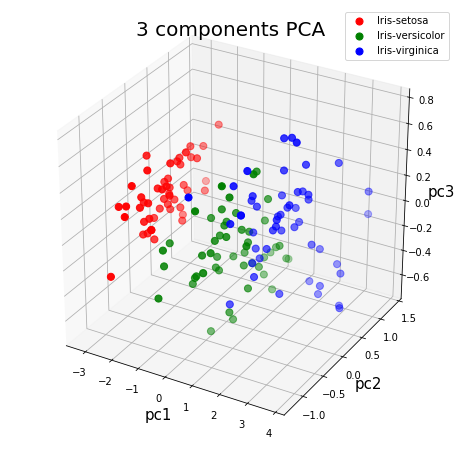

In [10]:
# Plotting 3d graph
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pc1', fontsize=15)
ax.set_ylabel('pc2', fontsize=15)
ax.set_zlabel('pc3', fontsize=15)
ax.set_title('3 components PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], finalDf.loc[indicesToKeep, 'pc3'], 
              c = color, s = 50)

ax.legend(targets)
ax.grid()
plt.show()